In [48]:

def image_normalize(img_i, sigma=1):
    """
    @param img_i: image to normalize
    @param sigma: value to multiply
    """
    nr, nc, nb = img_i.shape
    print(img_i.shape)
    img_n = np.zeros(shape=(nr, nc, nb))
    for i in range(nb):
        one_band = img_i[:, :, i]
        mi = np.min(one_band)
        ma = np.max(one_band)
        ma = 2200
        print(mi, ma, np.finfo(float).eps)
        one_band = (one_band - mi) / (ma - mi + np.finfo(float).eps)
        img_n[:, :, i] = sigma * one_band
    return img_n


def image_normalize_ndvi(img_i, sigma=1):
    """
    @param img_i: image to normalize
    @param sigma: value to multiply
    """
    nr, nc, nb = img_i.shape
    print(img_i.shape)
    img_n = np.zeros(shape=(nr, nc, nb))
    for i in range(nb):
        one_band = img_i[:, :, i]
        mi = -1
        ma = 1
        print(mi, ma, np.finfo(float).eps)
        one_band = (one_band - mi) / (ma - mi + np.finfo(float).eps)
        img_n[:, :, i] = sigma * one_band
    return img_n


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(38, 36, 3)
0.0 2200 2.220446049250313e-16
0.0 2200 2.220446049250313e-16
0.0 2200 2.220446049250313e-16


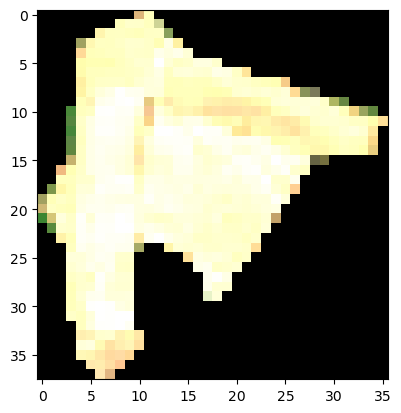

In [41]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

with rasterio.open("KasUnBrot_ee_save_image/20170719T103021_20170719T103023_T32UPA.tif", 'r') as ds:
    img_20170719 = ds.read()  # read all raster values
img_20170719 = np.transpose(img_20170719, [1, 2, 0])  # numpy array [row, col, bands]
img_20170719_rgb = img_20170719[:, :, [3, 2, 1]]
img_20170719_ndvi = img_20170719[:, :, [23]]
img_20170719_cvi = img_20170719[:, :, [25]]

# Image on 15/8/2017
with rasterio.open("KasUnBrot_ee_save_image/20170815T102021_20170815T102513_T32UPA.tif", 'r') as ds:
    img_20170815 = ds.read()  # read all raster values
img_20170815 = np.transpose(img_20170815, [1, 2, 0])  # numpy array [row, col, bands]
img_20170815_rgb = img_20170815[:, :, [3, 2, 1]]
img_20170815_ndvi = img_20170815[:, :, [23]]
img_20170815_cvi = img_20170815[:, :, [25]]

with rasterio.open("KasUnBrot_ee_save_image/20170825T102021_20170825T102114_T32UPA.tif", 'r') as ds:
    img_20170825 = ds.read()  # read all raster values
img_20170825 = np.transpose(img_20170825, [1, 2, 0])  # numpy array [row, col, bands]
img_20170825_rgb = img_20170825[:, :, [3, 2, 1]]
img_20170825_ndvi = img_20170825[:, :, [23]]
img_20170825_cvi = img_20170825[:, :, [25]]

plt.imshow(image_normalize(img_20170719_rgb, 2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(38, 36, 3)
0.0 2200 2.220446049250313e-16
0.0 2200 2.220446049250313e-16
0.0 2200 2.220446049250313e-16


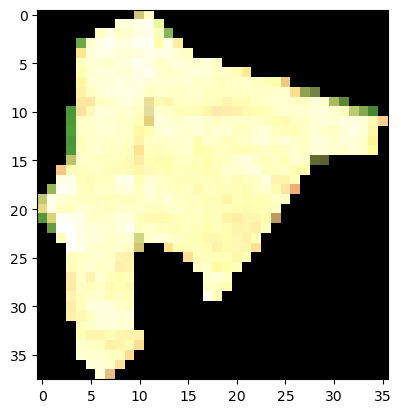

In [42]:
plt.imshow(image_normalize(img_20170815_rgb, 2))


(38, 36, 1)
-1 1 2.220446049250313e-16


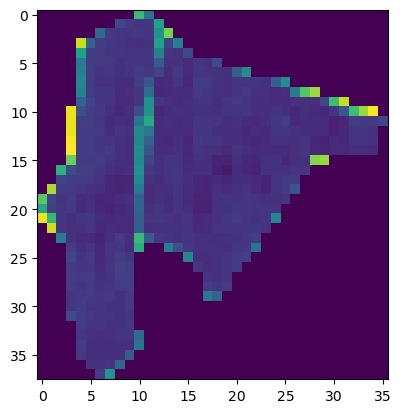

In [49]:
plt.imshow(image_normalize_ndvi(img_20170825_ndvi, 2))


In [36]:
import pandas as pd

pd.DataFrame(img_20170825_cvi.reshape([38,36]))

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.139184,0.133757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157951,0.109772,0.121780,0.124342,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.175292,0.102021,0.099055,0.108230,0.118584,0.125339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.160066,0.088227,0.096175,0.103534,0.120192,0.129114,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.142345,0.091800,0.097214,0.116502,0.099400,0.099792,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.153107,0.098961,0.102481,0.107229,0.097507,0.093910,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.176961,0.102596,0.094485,0.099753,0.095409,0.092074,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.151956,0.099361,0.095780,0.104296,0.104625,0.106073,...,0.216601,0.267259,0.208961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.116238,0.092445,0.108468,0.110650,0.089700,0.080782,...,0.149927,0.143887,0.135288,0.152147,0.203238,0.187652,0.000000,0.000000,0.000000,0.000000


In [46]:
diff = pd.DataFrame(img_20170825_ndvi.reshape([38,36]) - img_20170719_ndvi.reshape([38,36]))

In [47]:
df = diff.replace(0, np.NaN)
df.mean()


0    -0.022589
1    -0.016921
2    -0.037043
3    -0.014030
4     0.020468
5     0.009061
6    -0.004227
7    -0.006235
8    -0.003963
9    -0.006178
10    0.053518
11    0.025086
12    0.026707
13    0.000878
14   -0.001623
15   -0.007790
16   -0.006405
17   -0.008425
18   -0.006708
19   -0.013501
20   -0.013802
21   -0.026016
22   -0.025300
23   -0.031762
24   -0.026669
25   -0.029135
26   -0.046912
27   -0.057702
28   -0.045489
29   -0.055304
30   -0.075165
31   -0.065134
32   -0.029566
33   -0.037375
34   -0.143755
35   -0.076833
dtype: float64